In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
links = pd.read_csv("/content/drive/My Drive/recommender_systems/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
tags = pd.read_csv("/content/drive/My Drive/recommender_systems/tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [4]:
tags[tags['movieId'] == 2]

,userId,movieId,tag,timestamp
33,62,2,fantasy,1528843929
34,62,2,magic board game,1528843932
35,62,2,Robin Williams,1528843907
982,474,2,game,1137375552


In [5]:
movies = pd.read_csv("/content/drive/My Drive/recommender_systems/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
ratings = pd.read_csv("/content/drive/My Drive/recommender_systems/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352



Summary Statistics for Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


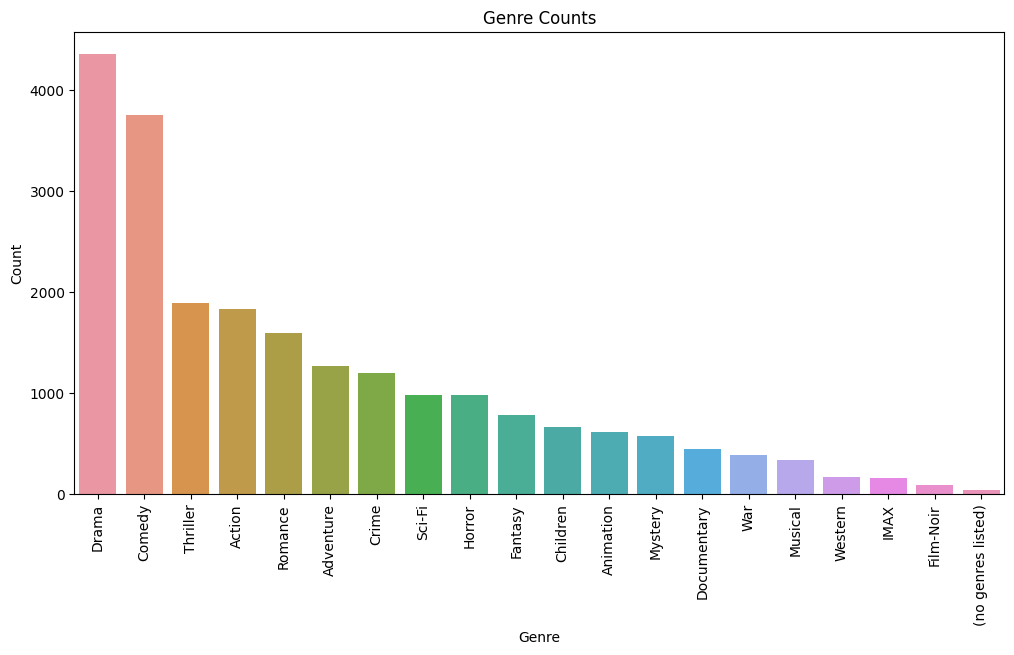

In [9]:
print("\nSummary Statistics for Ratings:")
print(ratings['rating'].describe())

genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Genre Counts")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [8]:
merged_df = pd.merge(movies, ratings, on='movieId')

In [9]:
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [10]:
merged_df['datetime'] = pd.to_datetime(merged_df.timestamp, unit='s')
merged_df["year"] = merged_df.datetime.dt.year
merged_df["month"] = merged_df.datetime.dt.month
merged_df["hour"] = merged_df.datetime.dt.hour
merged_df['weekday'] = merged_df.datetime.dt.day_name()
merged_df['month_year'] = merged_df.datetime.dt.to_period('M')
merged_df['day_of_week'] = merged_df.datetime.dt.day_of_week
merged_df['day'] = merged_df.datetime.dt.day
merged_df['month_name'] = merged_df.datetime.dt.month_name()
merged_df

,movieId,title,genres,userId,rating,timestamp,datetime,year,month,hour,weekday,month_year,day_of_week,day,month_name
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000-07-30 18:45:03,2000,7,18,Sunday,2000-07,6,30,July
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996-11-08 06:36:02,1996,11,6,Friday,1996-11,4,8,November
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,2005-01-25 06:52:26,2005,1,6,Tuesday,2005-01,1,25,January
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,2017-11-13 12:59:30,2017,11,12,Monday,2017-11,0,13,November
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,2011-05-18 05:28:03,2011,5,5,Wednesday,2011-05,2,18,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2018-09-16 14:44:42,2018,9,14,Sunday,2018-09,6,16,September
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,2018-09-16 14:52:25,2018,9,14,Sunday,2018-09,6,16,September
100833,193585,Flint (2017),Drama,184,3.5,1537109805,2018-09-16 14:56:45,2018,9,14,Sunday,2018-09,6,16,September
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,2018-09-16 15:00:21,2018,9,15,Sunday,2018-09,6,16,September


In [23]:
palette = []

for i in range(32):
    if i == 29:
        palette.append('#1fbad6')
    elif i == 30:
        palette.append('#d9d9d9')
    else:
        palette.append('#999999')

In [25]:
import plotly.express as px

palette = ['#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#2196f3', '#42a5f5', '#64b5f6', '#90caf9']

px.histogram(merged_df, x='month_name', color='weekday', barmode='group',
             labels = {'month_name':'Months', 'weekday':'Day of week'},
             title = 'Films by week day and month',
             color_discrete_sequence = palette,
             category_orders = {'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']}
             ).update_layout(yaxis_title = '',
                             plot_bgcolor = 'rgb(255, 255, 255)')

In [28]:
hour_data = merged_df.groupby('hour')['hour'].count().to_frame().rename(columns={'hour': 'Total'})

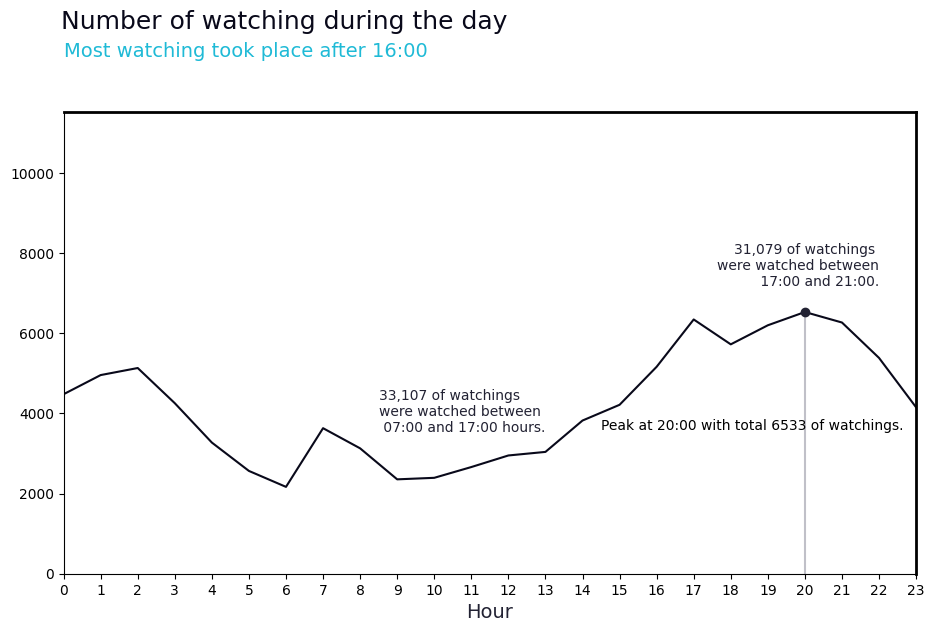

In [52]:
fig, ax = plt.subplots(figsize=(11, 6), dpi=100)
fig.fontsize = 20
ax.plot(hour_data, color='#09091a')
ax.set_xlim(0, 23)
ax.set_xticks(range(24))
ax.set_ylim(0, hour_data.Total.max() + 5000)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_xlabel('Hour', fontsize=14, color='#222233')
plt.suptitle('Number of watching during the day', fontsize=18, color='#09091a',
             x=0.123, y=1.05, ha='left')
ax.set_title('Most watching took place after 16:00',
             fontsize=14, loc='left', color='#1fbad6', y=1.1, ha='left')

ax.vlines(20, ymin=0, ymax=hour_data.Total.max(), color='#c0c0c8')
ax.text(8.5, hour_data.loc[12] * 1.2, '33,107 of watchings \nwere watched between\n 07:00 and 17:00 hours.', color='#222233')
ax.text(22, hour_data.loc[20] * 1.1, '31,079 of watchings \nwere watched between\n 17:00 and 21:00.',
        horizontalalignment='right', color='#222233')
ax.plot(20, hour_data.loc[20], 'o', color='#222233')
ax.text(14.5, hour_data.loc[12] * 1.22, 'Peak at 20:00 with total 6533 of watchings.')
plt.show()

In [12]:
donations_avg = round(merged_df.day.value_counts().mean(), 0)
daily_donations = merged_df.day.value_counts()
days_above_avg = daily_donations[daily_donations > donations_avg].to_frame().sort_index()

In [13]:
palette = []

for i in range(32):
    if i == 29:
        palette.append('#1fbad6')
    elif i == 30:
        palette.append('#d9d9d9')
    elif i+1 in days_above_avg.index:
        palette.append('#3f3f3f')
    else:
        palette.append('#999999')

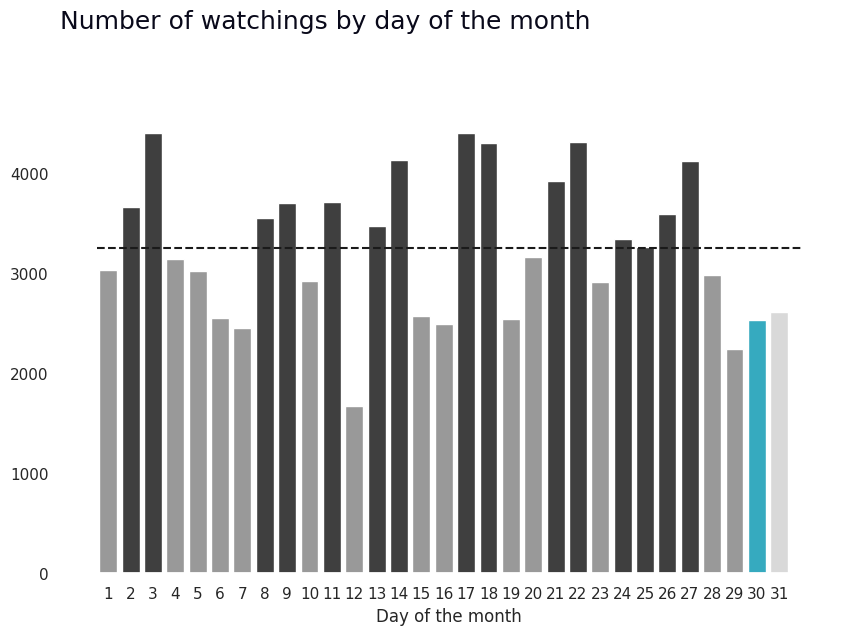

In [14]:
sns.set(rc={'figure.figsize':(10, 6),
            'axes.facecolor':'white',
            'figure.facecolor':'white'})
ax = sns.countplot(data=merged_df, x='day', palette=palette)
ax.set_xlabel('Day of the month', fontsize=12)
ax.set_ylabel('')
plt.suptitle('Number of watchings by day of the month', fontsize=18, color='#09091a',
             x=0.123, y=1.05, ha='left')
ax.hlines(donations_avg, xmin=-0.5, xmax=31, ls='--', colors='k')
ax;

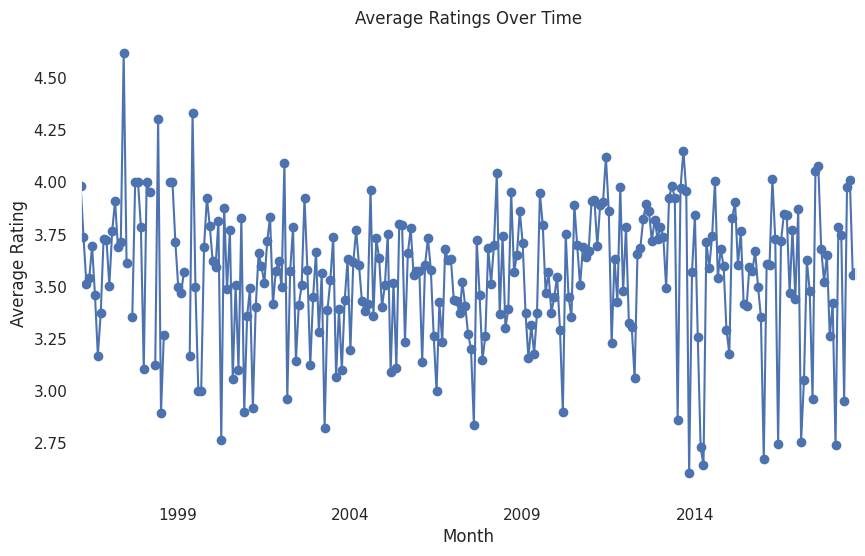

In [17]:
# Line plot of average ratings over time
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
average_ratings = ratings.groupby(pd.Grouper(key='datetime', freq='M'))['rating'].mean()
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='line', marker='o')
plt.title("Average Ratings Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()